In [5]:
import onnxruntime as rt
import onnx
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import img_as_float
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
sess = rt.InferenceSession("segnet_test.onnx")

In [7]:
# Let look at the input output layers of the onnx network

# Read the input of onnx
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name
print(input_name)
print(output_name)

imageinput
softmax_Transpose2


Reshaped image shape  (3, 512, 512)
Extended image shape  (1, 3, 512, 512)


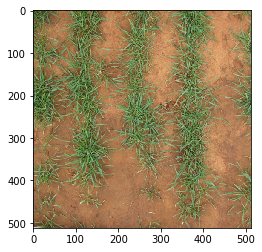

In [27]:
# Read and predict image
img = io.imread("images/wheat_partial_canopy_tillage_010.png")

# The model requires an input of 1,3,512,512
# Rearrange image (512*12*3->3*512*512)
np_transpose = np.transpose(img,(2, 1, 0))

# Convert image data to float
np_transpose_float =  np.asarray(np_transpose).astype("float32")

print("Reshaped image shape ",np_transpose_float.shape)

# model require 1,512,512,3 as a input
extend_img = np.expand_dims(np_transpose_float, 0)

print("Extended image shape ",extend_img.shape)



plt.imshow(img)

In [13]:
# Run the model
pred_onx = sess.run([output_name],{input_name:extend_img})[0][0] ## extracting the first two inputs

In [18]:
# Checking the result
# The onnx model generated by matlab segnet returns softmax layer of (1, 1, 3, 512, 512)
# Change the shape for easy access to the array

pred_transpose =np.transpose(pred_onx,(2, 1, 0))
print("pred_transpose",pred_transpose.shape)

print("1 >",pred_transpose[0][0][0])
print("2 >",pred_transpose[0][0][1])
print("3 >",pred_transpose[0][0][2])

sum = pred_transpose[0][0][0]+ pred_transpose[0][0][1] + pred_transpose[0][0][2]  
print("sum",sum)

pred_transpose (512, 512, 3)
1 > 0.8121416
2 > 0.07880403
3 > 0.109054334
sum 0.99999994


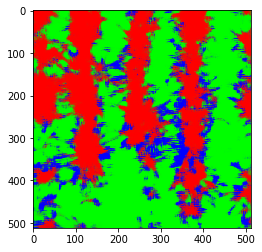

In [19]:
# view result prediction for each class
plt.imshow(kora)

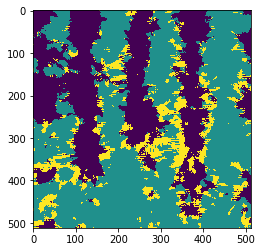

In [23]:
# Extrat the highers class probability from the softmax layer
pred_transpose_arg = np.argmax(pred_transpose, axis=2)
plt.imshow(pred_transpose_arg)

In [25]:
# Identify the pixel spread of each class
unique_group_name, counts = np.unique(pred_transpose_arg, return_counts=True)
pixel_spread = dict(zip(unique_group_name, counts))
pixel_spread

{0: 88679, 1: 139438, 2: 34027}

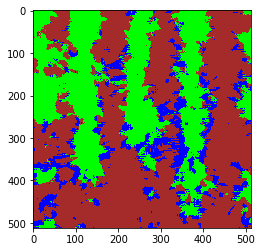

In [30]:
# Convert reuslt to RGB image
size  = 512
rgbArray = np.zeros((size,size,3), 'uint8')
width = size
height = size
for x in range(width):
    for y in range(height):
        #index = 0
        #max_prediction = 0
        #some_array
        #max_probability_index_holder[x][y] = index
        index = pred_transpose_arg[x][y]    
                
        if index == 0:
            # green 
            label_holder = "canopy"
            rgbArray[x,y,0] = 0
            rgbArray[x,y,1] = 255
            rgbArray[x,y,2] = 0

        elif index == 1:
            # brown
            label_holder = "soil"
            rgbArray[x,y,0] = 165
            rgbArray[x,y,1] = 42
            rgbArray[x,y,2] = 42
        elif index == 2:
            # Blue
            # stubble" 
            rgbArray[x,y,0] = 0
            rgbArray[x,y,1] = 0
            rgbArray[x,y,2] = 255
        else:
            # Red
            #"None"
            rgbArray[x,y,0] = 255
            rgbArray[x,y,1] = 0
            rgbArray[x,y,2] = 255
            
plt.imshow(rgbArray)
